# 2020 Year in Review - Strava Training Analysis

Strava is a social network of endurance athletes to connect, track and share progression in their fitness. I use the application to log my activities for training analysis and personal performance.

The purpose of this project was to explore my year in training using the Strava API to analyze the time I dedicated to training for the year for all of my logged runs, bikes and swims.

In [1]:
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pygal
from stravaio import strava_oauth2
from stravalib.client import Client

# Retrieve Client ID and API Secret from https://www.strava.com/settings/api

#strava_oauth2(client_id = config.client_id, client_secret=config.api_secret) # <----- Uncomment to retrieve access_token

In [2]:
client = Client(access_token = config.access_token)
#client.get_athlete() # <----- Uncomment to verify current athlete details

In [3]:
activities = client.get_activities(after = "2020-01-01T00:00:00Z", before = "2020-12-31T00:00:00Z")
#list(activities) #list all activities from given time range

In [4]:
#convert to a list
sample = list(activities)[0]
sample.to_dict()
sample

<Activity id=4540308972 name='Watopia' resource_state=2>

In [5]:
# retrieve columns needed and put into a separate list
# reference https://developers.strava.com/docs/reference/ for available parameters
my_cols =['name', 'type', 'distance',
         'moving_time','elapsed_time',
          'average_speed', 'max_speed',
          'average_heartrate', 'max_heartrate', 'suffer_score',
          'average_cadence', 'average_watts',
         'weighted_average_watts', 'max_watts',
          'total_elevation_gain', 'elev_high',
         'elev_low', 'start_date']

In [6]:
#iterate over all activites and save values
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

In [7]:
#convert my_cols into a dataframe
df = pd.DataFrame(data, columns=my_cols)

In [8]:
#return number of rows and columns
df.shape

(355, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    355 non-null    object 
 1   type                    355 non-null    object 
 2   distance                355 non-null    float64
 3   moving_time             355 non-null    object 
 4   elapsed_time            355 non-null    object 
 5   average_speed           355 non-null    float64
 6   max_speed               355 non-null    float64
 7   average_heartrate       311 non-null    float64
 8   max_heartrate           311 non-null    float64
 9   suffer_score            311 non-null    float64
 10  average_cadence         274 non-null    float64
 11  average_watts           156 non-null    float64
 12  weighted_average_watts  108 non-null    float64
 13  max_watts               108 non-null    float64
 14  total_elevation_gain    355 non-null    fl

In [10]:
#Checking the existence of the null values in the dataset
df.isnull().sum(axis=0)

name                        0
type                        0
distance                    0
moving_time                 0
elapsed_time                0
average_speed               0
max_speed                   0
average_heartrate          44
max_heartrate              44
suffer_score               44
average_cadence            81
average_watts             199
weighted_average_watts    247
max_watts                 247
total_elevation_gain        0
elev_high                  33
elev_low                   33
start_date                  0
dtype: int64

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
max_watts,247,69.577465
weighted_average_watts,247,69.577465
average_watts,199,56.056338
average_cadence,81,22.816901
max_heartrate,44,12.394366
suffer_score,44,12.394366
average_heartrate,44,12.394366
elev_high,33,9.295775
elev_low,33,9.295775
elapsed_time,0,0.000000


In [12]:
df.head()

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date
0,Watopia,VirtualRide,35504.2,1:01:26,1:01:26,9.632,11.7,137.6,166.0,32.0,78.0,141.5,144.0,248.0,53.0,17.6,12.6,2020-12-30T16:34:27+00:00
1,Watopia,VirtualRide,35540.5,1:02:22,1:02:22,9.498,11.7,138.5,157.0,31.0,72.7,142.9,145.0,214.0,53.0,17.6,12.6,2020-12-29T19:47:48+00:00
2,Steady for most + a couple uptempo reps,Run,20947.4,1:39:36,1:40:07,3.505,4.5,170.4,187.0,214.0,89.3,NaN,NaN,NaN,16.2,183.3,177.8,2020-12-27T14:58:05+00:00
3,Lunch Run,Run,9801.7,0:55:05,0:56:29,2.966,4.8,155.8,174.0,66.0,88.1,NaN,NaN,NaN,8.7,183.2,177.8,2020-12-26T18:38:52+00:00
4,Lunch Run,Run,9705.4,0:56:21,0:56:36,2.871,4.0,147.1,170.0,39.0,88.4,NaN,NaN,NaN,12.4,183.3,176.2,2020-12-25T18:27:11+00:00


In [13]:
df.shape

(355, 18)

# Data preparation and conversions

In [14]:
# Create an Indoor Ride flag for all virtual rides
df.insert(18, "indoor_flag", 0, allow_duplicates = False)
df.loc[(df['type'] == 'VirtualRide'), 'indoor_flag'] = 1

In [15]:
#heart rate zones are based off of my personal fitness
import datetime
df.insert(19, "heartrate_zone", 0, allow_duplicates = False)
df.loc[(df['average_heartrate'] <= 130), 'heartrate_zone'] = 1

df.loc[(df['average_heartrate'] <= 162) & (df['average_heartrate'] > 130), 'heartrate_zone'] = 2

df.loc[(df['average_heartrate'] <= 178) & (df['average_heartrate'] > 162), 'heartrate_zone'] = 3

df.loc[(df['average_heartrate'] <= 194) & (df['average_heartrate'] > 178), 'heartrate_zone'] = 4

df.loc[(df['average_heartrate'] > 194), 'heartrate_zone'] = 5

In [16]:
# Convert all VirtualRide types to 'Ride'
df = df.replace(['VirtualRide'],'Ride')

#convert distance in meters to miles for runs, rides and virtual rides
df.loc[:,'distance'] = round((df.distance / 1609),2)

#convert average_speed to mi/h
df.loc[:,'average_speed'] = round((df.average_speed * 2.24),2)

#convert average_speed to mi/h
df.loc[:,'max_speed'] = round((df.max_speed * 2.24),2)

#convert total_elevation_gain in meters to feet
df.loc[:,'total_elevation_gain'] = round((df.total_elevation_gain * 3.281),2)

#convert elev_high in meters to feet
df.loc[:,'elev_high'] = round((df.elev_high * 3.281),2)

#convert elev_low in meters to feet
df.loc[:,'elev_low'] = round((df.elev_low * 3.281),2)

#convert start_time to date time
df['start_date'] = pd.to_datetime(df['start_date'])

#convert moving_time to a time delta
df['moving_time'] = round((pd.to_timedelta(df['moving_time']).apply(lambda x: x/np.timedelta64(1,'m'))),2)

#total moving time hours
df['hours'] = round((df['moving_time'] / 60),2)

#year
df['year'] = df['start_date'].dt.year

#month
df['month'] = df['start_date'].dt.month

#month and year
df['month_year'] = df['start_date'].apply(lambda x: x.strftime('%Y-%m'))

df['week_no'] = df['start_date'].dt.isocalendar().week

#day of the week
df['day_of_week'] = df['start_date'].dt.day_name()


In [17]:
df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
0,Watopia,Ride,22.07,61.43,1:01:26,21.58,26.21,137.6,166.0,32.0,...,41.34,2020-12-30 16:34:27+00:00,1,2,1.02,2020,12,2020-12,53,Wednesday
1,Watopia,Ride,22.09,62.37,1:02:22,21.28,26.21,138.5,157.0,31.0,...,41.34,2020-12-29 19:47:48+00:00,1,2,1.04,2020,12,2020-12,53,Tuesday
2,Steady for most + a couple uptempo reps,Run,13.02,99.60,1:40:07,7.85,10.08,170.4,187.0,214.0,...,583.36,2020-12-27 14:58:05+00:00,0,3,1.66,2020,12,2020-12,52,Sunday
3,Lunch Run,Run,6.09,55.08,0:56:29,6.64,10.75,155.8,174.0,66.0,...,583.36,2020-12-26 18:38:52+00:00,0,2,0.92,2020,12,2020-12,52,Saturday
4,Lunch Run,Run,6.03,56.35,0:56:36,6.43,8.96,147.1,170.0,39.0,...,578.11,2020-12-25 18:27:11+00:00,0,2,0.94,2020,12,2020-12,52,Friday
5,"4mi easy, 5x 2minutes @ 10k, 1 off, cool down",Run,7.03,61.23,1:01:59,6.90,12.10,161.3,194.0,98.0,...,585.66,2020-12-23 15:13:33+00:00,0,2,1.02,2020,12,2020-12,52,Wednesday
6,Lunch Run with Brady,Run,3.47,32.30,0:37:41,6.45,11.65,153.2,178.0,34.0,...,585.33,2020-12-22 17:39:53+00:00,0,2,0.54,2020,12,2020-12,52,Tuesday
7,Morning Run,Run,11.05,100.73,1:43:41,6.59,25.98,153.8,172.0,113.0,...,579.42,2020-12-20 16:33:05+00:00,0,2,1.68,2020,12,2020-12,51,Sunday
8,Much needed,Run,10.08,90.15,1:31:02,6.72,12.54,157.3,178.0,126.0,...,583.36,2020-12-19 16:43:34+00:00,0,2,1.50,2020,12,2020-12,51,Saturday
9,Lunch Run with Brady,Run,5.02,45.82,0:47:30,6.58,12.77,148.7,174.0,38.0,...,578.11,2020-12-15 17:45:28+00:00,0,2,0.76,2020,12,2020-12,51,Tuesday


# Count of workouts by activity in 2020
Swim workouts were manually logged. Hikes were from a trip to Colorado.

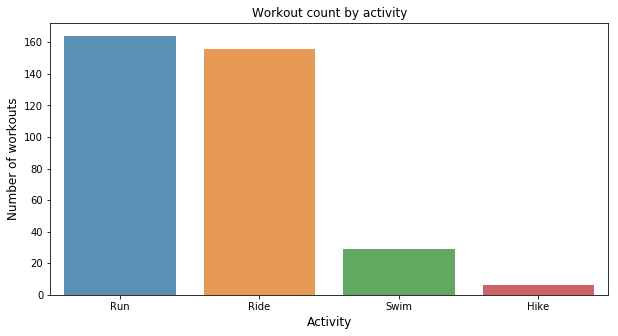

In [18]:
type_count  = df['type'].value_counts()
type_count = type_count[:4,]
plt.figure(figsize=(10,5))
sns.barplot(type_count.index, type_count.values, alpha=0.8)
plt.title('Workout count by activity')
plt.ylabel('Number of workouts', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.show()

In [19]:
#Counts of activites
df.type.value_counts()

Run     164
Ride    156
Swim     29
Hike      6
Name: type, dtype: int64

In [20]:
#total hours of training
df['hours'].sum()

341.33

In [21]:
# total hours for the year by activity
(df.groupby('type')['hours'].sum())

type
Hike      7.69
Ride    194.79
Run     122.50
Swim     16.35
Name: hours, dtype: float64

# Longest activities in miles for the year

In [22]:
# longest activities of the year in miles
df.groupby('type')['distance'].nlargest(1)

type     
Hike  120     7.13
Ride  51     67.89
Run   2      13.02
Swim  347     1.77
Name: distance, dtype: float64

# Fastest workouts of the year by activity

All swims for the year were logged manually. The Garmin Forerunner 235 watch is built specifically for running.

In [23]:
swims = df.loc[(df['type'] == 'Swim')]

swims_df = swims.sort_values(by = 'average_speed', ascending = False) 

swims_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
290,Morning Swim,Swim,0.93,26.65,0:26:39,2.10,0.0,NaN,NaN,NaN,...,NaN,2020-03-08 13:46:20+00:00,0,0,0.44,2020,3,2020-03,10,Sunday
327,Morning Swim,Swim,0.93,26.98,0:26:59,2.07,0.0,NaN,NaN,NaN,...,NaN,2020-01-26 14:07:51+00:00,0,0,0.45,2020,1,2020-01,4,Sunday
72,Afternoon Swim,Swim,0.78,22.82,0:22:49,2.05,0.0,NaN,NaN,NaN,...,NaN,2020-10-22 21:16:39+00:00,0,0,0.38,2020,10,2020-10,43,Thursday
322,Morning Swim,Swim,1.03,30.08,0:30:05,2.05,0.0,NaN,NaN,NaN,...,NaN,2020-01-31 12:48:00+00:00,0,0,0.50,2020,1,2020-01,5,Friday
319,Morning Swim,Swim,0.93,27.47,0:27:28,2.04,0.0,NaN,NaN,NaN,...,NaN,2020-02-02 13:57:27+00:00,0,0,0.46,2020,2,2020-02,5,Sunday


Only view rides done outdoors. Factor in slowing down for red lights for average speed. Race situation, average speed would (hopefully) be higher.

In [24]:
rides = df.loc[(df['type'] == 'Ride') & df['indoor_flag'] == 0]

ride_df = rides.sort_values(by = 'average_speed', ascending = False) 

ride_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
108,Morning Ride,Ride,35.74,119.20,1:59:52,18.01,27.33,152.3,171.0,164.0,...,582.71,2020-09-27 14:09:11+00:00,0,2,1.99,2020,9,2020-09,39,Sunday
167,Morning Ride,Ride,33.68,113.10,1:53:06,17.89,25.54,163.5,180.0,225.0,...,597.47,2020-08-15 13:54:33+00:00,0,3,1.88,2020,8,2020-08,33,Saturday
154,Morning Ride,Ride,31.36,108.17,1:48:10,17.42,23.52,148.1,166.0,126.0,...,581.07,2020-08-26 11:17:40+00:00,0,2,1.80,2020,8,2020-08,35,Wednesday
163,Morning Ride,Ride,24.01,83.15,1:23:54,17.35,23.07,78.5,79.0,7.0,...,582.71,2020-08-19 11:40:28+00:00,0,1,1.39,2020,8,2020-08,34,Wednesday
146,Morning Ride,Ride,31.08,107.82,1:49:26,17.32,31.36,151.1,171.0,137.0,...,582.71,2020-08-30 15:26:38+00:00,0,2,1.80,2020,8,2020-08,35,Sunday


Zone 3 and Zone 4 tempo and threshold efforts no longer than 5mi

In [25]:
runs = df.loc[(df['type'] == 'Run')]

run_df = runs.sort_values(by = 'average_speed', ascending = False) 

run_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
45,20 min Tempo Run,Run,3.00,20.05,0:20:03,9.00,10.08,181.8,189.0,67.0,...,585.66,2020-11-11 16:55:52+00:00,0,4,0.33,2020,11,2020-11,46,Wednesday
160,Uptempo,Run,2.01,14.95,0:14:57,8.06,9.41,180.7,190.0,54.0,...,587.30,2020-08-22 12:06:56+00:00,0,4,0.25,2020,8,2020-08,34,Saturday
123,"4x 800m, 400m recovery",Run,2.98,22.47,0:22:28,7.98,11.87,175.4,190.0,70.0,...,582.71,2020-09-18 12:17:54+00:00,0,3,0.37,2020,9,2020-09,38,Friday
2,Steady for most + a couple uptempo reps,Run,13.02,99.60,1:40:07,7.85,10.08,170.4,187.0,214.0,...,583.36,2020-12-27 14:58:05+00:00,0,3,1.66,2020,12,2020-12,52,Sunday
92,Steady Run,Run,5.02,38.92,0:39:39,7.75,12.77,168.5,185.0,96.0,...,577.78,2020-10-07 21:13:57+00:00,0,3,0.65,2020,10,2020-10,41,Wednesday


# Total hours trained per month
Took a trip to CO end of September. Hikes accounting for over 7 hours of total count.

In [26]:
# Total hours of training per month
df.groupby(['month_year'])['hours'].sum()

month_year
2020-01    27.04
2020-02    22.21
2020-03    21.19
2020-04    17.62
2020-05    14.17
2020-06    27.04
2020-07    34.04
2020-08    38.16
2020-09    46.04
2020-10    36.64
2020-11    35.70
2020-12    21.48
Name: hours, dtype: float64

In [27]:
activity_month = df.groupby(['month_year'])['hours'].sum().reset_index(name='hours')

alt.Chart(activity_month).mark_bar(size=25).encode(
    x=alt.X('month_year:T', axis=alt.Axis(title='Month')),
    y='hours:Q'
).properties(
    width=800,
    height=200,
    title='Hours trained per month in 2020'
)

alt.Chart(...)

# Total hours of training per week

In [28]:
# Total hours of training per week
df.groupby(['week_no'])['hours'].sum()

week_no
1      4.99
2      7.09
3      4.69
4      7.23
5      7.82
6      0.59
7      2.61
8      8.12
9      7.72
10     8.20
11     3.27
12     4.96
13     2.52
14     2.85
15     4.58
16     4.83
17     4.56
18     4.17
19     1.09
20     2.77
21     3.71
22     3.86
23     4.17
24     5.21
25     6.77
26     8.67
27     7.20
28     5.70
29     9.56
30     8.31
31     8.69
32     4.47
33     8.77
34    10.11
35    11.61
36     8.34
37     7.97
38    10.32
39    14.75
40     9.75
41     7.07
42     8.33
43     9.31
44     9.14
45     8.99
46     7.02
47     8.25
48     9.14
49     3.62
50     6.78
51     3.94
52     5.08
53     2.06
Name: hours, dtype: float64

In [29]:
activity_week = df.groupby(['week_no'])['hours'].sum().reset_index(name='hours')

alt.Chart(activity_week).mark_bar(size=10).encode(
    x=alt.X('week_no:T', axis=alt.Axis(title='Week')),
    y='hours:Q'
).properties(
    width=500,
    height=200,
    title='Hours trained per week in 2020'
)

alt.Chart(...)

# Average hours of training per week to date

In [30]:
#calculate average hours of training per week to date
week = df['week_no']
max_week = week.max()
total_hours_trained = df['hours'].sum()
round((total_hours_trained / max_week),2) 

6.44

# Average moving time per activity

In [31]:
#Average time of each activity
round((df['moving_time'].mean()),2)

57.71

# Average hours of training during the week by day

In [32]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

bar = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X('day_of_week', sort=days, axis=alt.Axis(title='Day of the Week')),
    y='mean(hours)',
    color='mean(hours):Q'
)

rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(hours):Q'
)

(bar + rule).properties(
    width=500,
    title='Activity hours by day of the week'
)

alt.LayerChart(...)

In [33]:
#Describe average heartrate by activity type
df.groupby('type')[['average_heartrate']].describe()

average_heartrate                                                         \
                 count        mean        std    min     25%     50%      75%   
type                                                                            
Hike               6.0  117.983333   6.158707  108.6  114.25  119.25  123.125   
Ride             145.0  138.468966  14.100574   78.5  136.20  141.70  146.700   
Run              160.0  156.069375   8.811328  113.1  151.30  155.65  160.425   
Swim               0.0         NaN        NaN    NaN     NaN     NaN      NaN   

             
        max  
type         
Hike  123.8  
Ride  163.5  
Run   181.8  
Swim    NaN

In [34]:
#Describe max heartrate by activity type
df.groupby('type')[['max_heartrate']].describe()

max_heartrate                                                            
             count        mean        std    min     25%    50%     75%    max
type                                                                          
Hike           6.0  152.500000   5.540758  146.0  149.25  151.0  155.75  161.0
Ride         145.0  160.537931  15.407439   79.0  156.00  163.0  169.00  197.0
Run          160.0  174.281250   9.631037  149.0  168.00  174.0  180.25  200.0
Swim           0.0         NaN        NaN    NaN     NaN    NaN     NaN    NaN

In [35]:
df_num_corr = df.corr()['average_heartrate'][:-1]
relevant_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
relevant_features

average_heartrate         1.000000
max_heartrate             0.831716
heartrate_zone            0.818535
average_cadence           0.678288
average_watts             0.616903
weighted_average_watts    0.568810
suffer_score              0.500324
Name: average_heartrate, dtype: float64

# Average Heartrate Histogram
My heart rate for majority of my activities at the beginning of the year was in "Zone 2" between 60-75% of my maximum heart rate. These relatively easier efforts allowed me to maintain consistent training, recover adequately and slowly develop an aerobic engine without feeling physically drained.

In [36]:
alt.Chart(df).mark_bar().encode(
    alt.X("average_heartrate:Q",bin=alt.Bin(step=10)),
    y=alt.Y('count(activity_id):Q', axis=alt.Axis(title='# of activities'))).properties(
    width=500,
    title='Average Heartrate Histogram')

alt.Chart(...)

# Time spent in heart rate zone
Treadmill runs and swims account for the '0' heartrate zones

In [37]:
df.groupby(['heartrate_zone'])['hours'].sum()

heartrate_zone
0     30.43
1     33.35
2    250.98
3     25.43
4      1.14
Name: hours, dtype: float64

# Heartrate barplot by zone

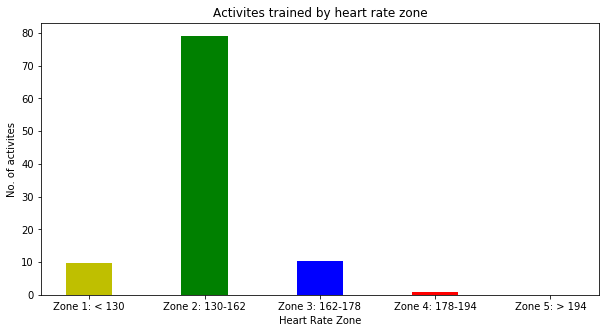

In [38]:
# Prepare the heartrate data for barplot
counts = [0, 0, 0, 0, 0]
 
hrdata = df['average_heartrate']
for point in hrdata:
        if (point <= 130):
            counts[0] += 1
        elif (point > 130 and point <= 162):
            counts[1] += 1
        elif (point > 162 and point <= 178):
            counts[2] += 1
        elif (point > 178 and point <= 194):
            counts[3] += 1
        elif (point > 194):
            counts[4] += 1
tmp = counts
total = sum(tmp)
counts = [(1. * x / total) * 100 for x in tmp]

# creating the dataset 
data = {'Zone 1: < 130':counts[0], 'Zone 2: 130-162':counts[1], 'Zone 3: 162-178':counts[2],  
        'Zone 4: 178-194':counts[3], 'Zone 5: > 194': counts[4]} 
    
hrz = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(hrz, values, color ='ygbrr',  
        width = 0.4) 
  
plt.xlabel("Heart Rate Zone") 
plt.ylabel("No. of activites") 
plt.title("Activites trained by heart rate zone") 
plt.show() 

# Heartrate Intensity
Strava's 'Relative Effort' is an analysis of heart rate data and intensity.
***The suffer score metric is only available to Premium Strava subscribers.***

In [39]:
#https://alancouzens.com/blog/optimal_periodization.html
# put training volume per month + average suffer score in an array ==> possible next functionality
# average suffer score from the year
round((df['suffer_score'].mean()),2)

62.81

In [40]:
# average intensity each month
round((df.groupby(['month'])['suffer_score'].mean()),2)

month
1     65.50
2     56.93
3     49.52
4     39.21
5     38.85
6     78.78
7     81.25
8     78.78
9     63.91
10    61.74
11    57.42
12    73.48
Name: suffer_score, dtype: float64

# Monthly Intensity Average
Because of COVID-19 I was hesitant and fearful to train in the Spring with triathlons being cancelled and postponed. With reopenings and more availability to routes in June, I decided to ramp up in training and maintain consistency. As temperatures dropped in the Fall, my relative intensity fell with slightly higher volumes. This can indicate gains in fitness from acclimation to the heat or from consistency. I find that workouts in the Fall, Winter and early Spring are easier for as my body is more comfortable in cooler temperatures.

In [41]:
bar = alt.Chart(df).mark_bar(size=30).encode(
    x=alt.X('month', sort=days, axis=alt.Axis(title='Month')),
    y='mean(suffer_score)',
    color='mean(suffer_score):Q'
)

rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(suffer_score):Q'
)

(bar + rule).properties(
    width=500,
    title='Intensity Average'
)

alt.LayerChart(...)

# Weekly Intenisty

In [42]:
#current week statistics
current_week_df = df.loc[df['week_no'] == df['week_no'].max()]

In [43]:
current_week_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
0,Watopia,Ride,22.07,61.43,1:01:26,21.58,26.21,137.6,166.0,32.0,...,41.34,2020-12-30 16:34:27+00:00,1,2,1.02,2020,12,2020-12,53,Wednesday
1,Watopia,Ride,22.09,62.37,1:02:22,21.28,26.21,138.5,157.0,31.0,...,41.34,2020-12-29 19:47:48+00:00,1,2,1.04,2020,12,2020-12,53,Tuesday


In [44]:
#last week statistics
last_week_df = df.loc[df['week_no'] == df['week_no'].max()-1]

In [45]:
last_week_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
2,Steady for most + a couple uptempo reps,Run,13.02,99.60,1:40:07,7.85,10.08,170.4,187.0,214.0,...,583.36,2020-12-27 14:58:05+00:00,0,3,1.66,2020,12,2020-12,52,Sunday
3,Lunch Run,Run,6.09,55.08,0:56:29,6.64,10.75,155.8,174.0,66.0,...,583.36,2020-12-26 18:38:52+00:00,0,2,0.92,2020,12,2020-12,52,Saturday
4,Lunch Run,Run,6.03,56.35,0:56:36,6.43,8.96,147.1,170.0,39.0,...,578.11,2020-12-25 18:27:11+00:00,0,2,0.94,2020,12,2020-12,52,Friday
5,"4mi easy, 5x 2minutes @ 10k, 1 off, cool down",Run,7.03,61.23,1:01:59,6.90,12.10,161.3,194.0,98.0,...,585.66,2020-12-23 15:13:33+00:00,0,2,1.02,2020,12,2020-12,52,Wednesday
6,Lunch Run with Brady,Run,3.47,32.30,0:37:41,6.45,11.65,153.2,178.0,34.0,...,585.33,2020-12-22 17:39:53+00:00,0,2,0.54,2020,12,2020-12,52,Tuesday


In [46]:
line_chart = pygal.Line()
line_chart.title = 'Weekly Intensity'
line_chart.x_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
line_chart.add('Current Week', [current_week_df.loc[(current_week_df['day_of_week'] == 'Monday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Tuesday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Wednesday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Thursday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Friday')]['suffer_score'].sum()
                               ,current_week_df.loc[(current_week_df['day_of_week'] == 'Saturday')]['suffer_score'].sum()
                               ,current_week_df.loc[(current_week_df['day_of_week'] == 'Sunday')]['suffer_score'].sum()])

line_chart.add('Last Week', [last_week_df.loc[(last_week_df['day_of_week'] == 'Monday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Tuesday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Wednesday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Thursday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Friday')]['suffer_score'].sum()
                               ,last_week_df.loc[(last_week_df['day_of_week'] == 'Saturday')]['suffer_score'].sum()
                               ,last_week_df.loc[(last_week_df['day_of_week'] == 'Sunday')]['suffer_score'].sum()])
line_chart.render_to_file('weekly_intensity.svg')
#.render_in_browser()

# Average heartrate and speed (mph)

In [47]:
brush = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
    x='average_speed:Q',
    y='average_heartrate:Q',
    color=alt.condition(brush, 'type:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(df).mark_bar().encode(
    y='type:N',
    color='type:N',
    x='count(type):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)